In [1]:
import requests
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set_style("darkgrid")

In [2]:
import datapane as dp

In [3]:
#game data
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'

r = requests.get(url)

json_data = r.json()

elements_df = pd.DataFrame(json_data['elements'])
elements_types_df = pd.DataFrame(json_data['element_types'])
teams_df = pd.DataFrame(json_data['teams'])

In [4]:
json_data.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [5]:
json_data['total_players']

7817714

In [9]:
url = 'https://fantasy.premierleague.com/api/leagues-classic/480110/standings/'

r = requests.get(url)

league = r.json()

df_league = pd.DataFrame(league['standings']['results'])

df_league

,id,event_total,player_name,rank,last_rank,rank_sort,total,entry,entry_name
0,29737703,73,Harry Lewis,1,2,1,1009,4721757,The Number Bods
1,28311597,60,Charlie Sussman,2,1,2,998,4421171,Cesc and the City
2,15617309,66,Bec Sims Robinson,3,4,3,967,2704825,David Rebeckham
3,24082994,88,Danielle Anderson,4,7,4,953,3948164,The Brighton Belles
4,32362089,54,Laura Gabb,5,5,5,949,5096034,Gabbster FC
5,35765065,42,Geraint Evans,6,3,6,943,5547276,WestminsterWanderers
6,29435857,74,Angus Boobbyer,7,8,7,937,4686356,CHANGE NAME
7,12874407,56,Luke Betham,8,6,8,937,1409005,Nanas Squad
8,35578383,51,Ali Neyle,9,9,9,901,5522259,Neyley there
9,19184126,51,Pandora Lefroy,10,10,10,890,3245081,Pique Blinders


In [10]:
url = 'https://fantasy.premierleague.com/api/entry/4914782/history/'
r = requests.get(url)
json = r.json()
json.keys()

dict_keys(['current', 'past', 'chips'])

In [11]:
pd.DataFrame(json['past'])

,season_name,total_points,rank
0,2018/19,1824,3862562
1,2019/20,1898,3108475


In [12]:
df_all = pd.DataFrame(columns=['event', 'points', 'total_points', 'rank', 'rank_sort', 'overall_rank',
       'bank', 'value', 'event_transfers', 'event_transfers_cost',
       'points_on_bench', 'player','team_name'])
# get all players data from a league
for i, val in enumerate(df_league.entry):
    url = 'https://fantasy.premierleague.com/api/entry/{}/history/'.format(val)

    r = requests.get(url)

    json = r.json()

    df_temp=pd.DataFrame(json['current'])
    print(val,df_league.iloc[i,2],df_league.iloc[i,8])
    df_temp['player'] = df_league.iloc[i,2]
    df_temp['team_name'] = df_league.iloc[i,8]
    df_all= pd.concat([df_all,df_temp])
    

4721757 Harry Lewis The Number Bods
4421171 Charlie Sussman Cesc and the City
2704825 Bec Sims Robinson David Rebeckham
3948164 Danielle Anderson The Brighton Belles
5096034 Laura Gabb Gabbster FC
5547276 Geraint Evans WestminsterWanderers
4686356 Angus Boobbyer CHANGE NAME
1409005 Luke Betham Nanas Squad
5522259 Ali Neyle Neyley there
3245081 Pandora Lefroy Pique Blinders
2193758 Vincent Fabri S Club Vardy
5074989 Mark MacGregor And In Last Place
5141343 James English Evil Twin
3186195 Alex Scarborough Kroos Control
2392884 Daniel Rice Whole Jota Love
698742 Oliver Wilson First Amalgamated FC
3159864 Peter Lyburn Stonehaven Rovers
5633746 Liam O’Keefe Cabbage and Ribs
5656552 John Moylan FC Moyles
5568123 Laurence Pemberton Netflix & Chillwell


In [13]:
# cleaning
for col in df_all:
    try:
        df_all[col]=df_all[col].astype(float)
    except:
        pass
    
df_all['player'] = df_all['player'].apply(lambda x: "Alex Andreou" if x == "A A" else x)

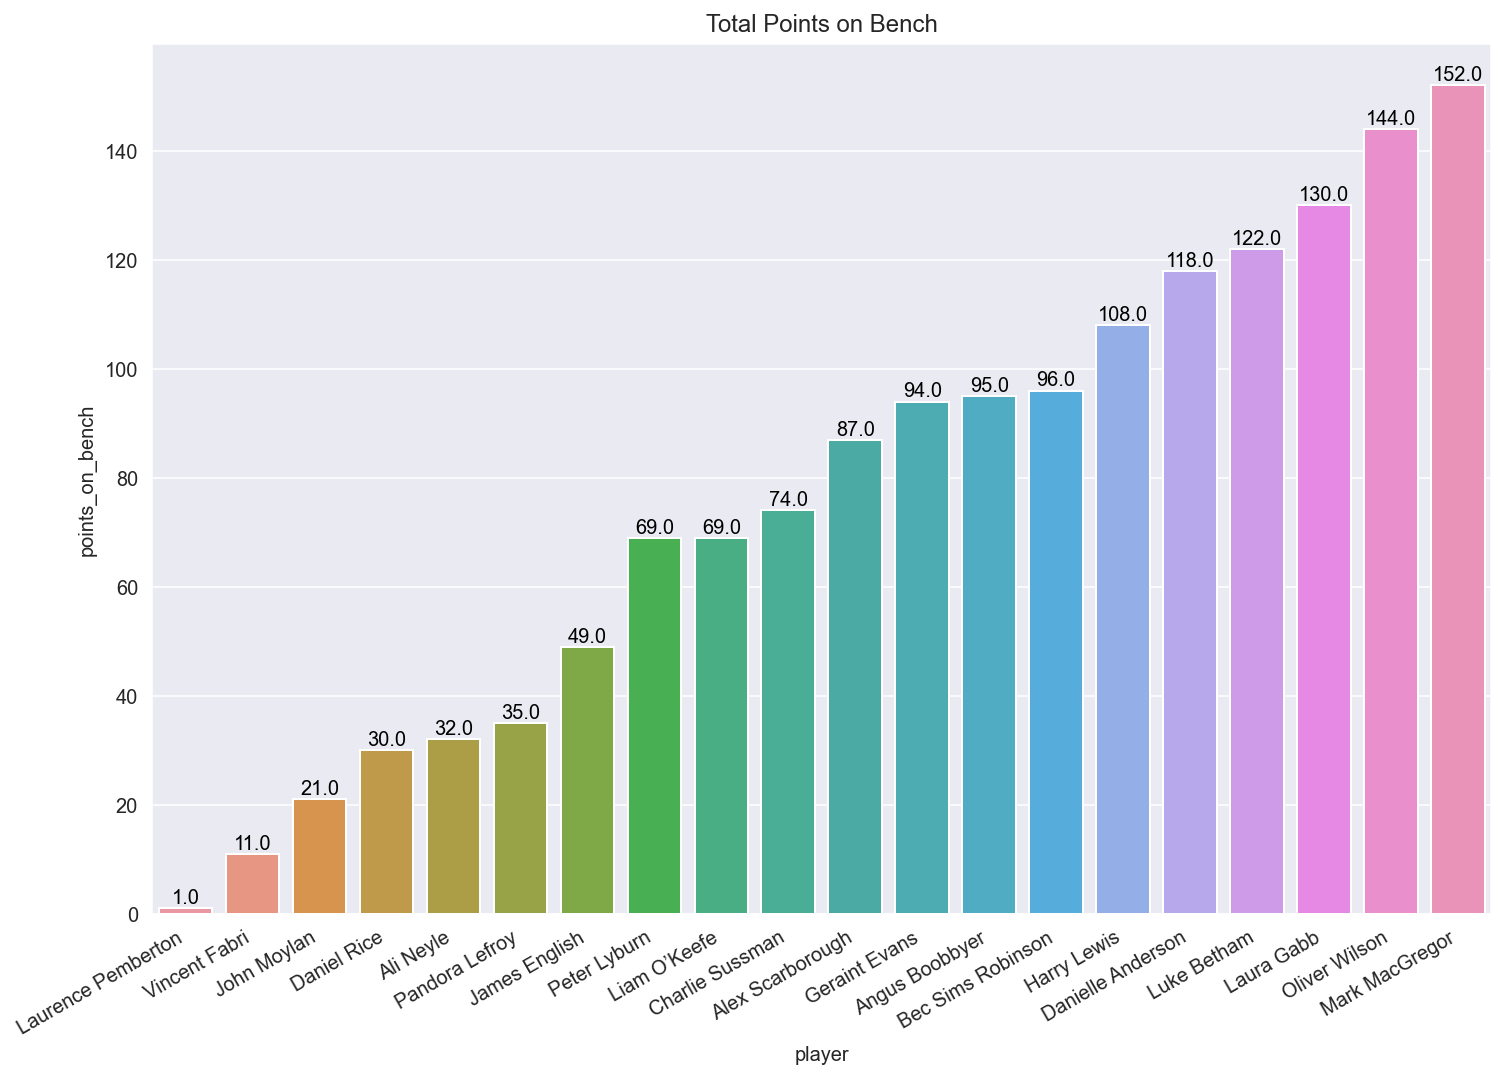

In [15]:
# Total points on Bench
df_temp = df_all.groupby('player').sum()[['points_on_bench']].sort_values('points_on_bench')
plt.figure(figsize=(12,8))
bench_chart=sns.barplot(y=df_temp.points_on_bench,x=df_temp.index)
plt.title("Total Points on Bench")
plt.xticks(rotation=30,ha="right")
for p in bench_chart.patches:
    bench_chart.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

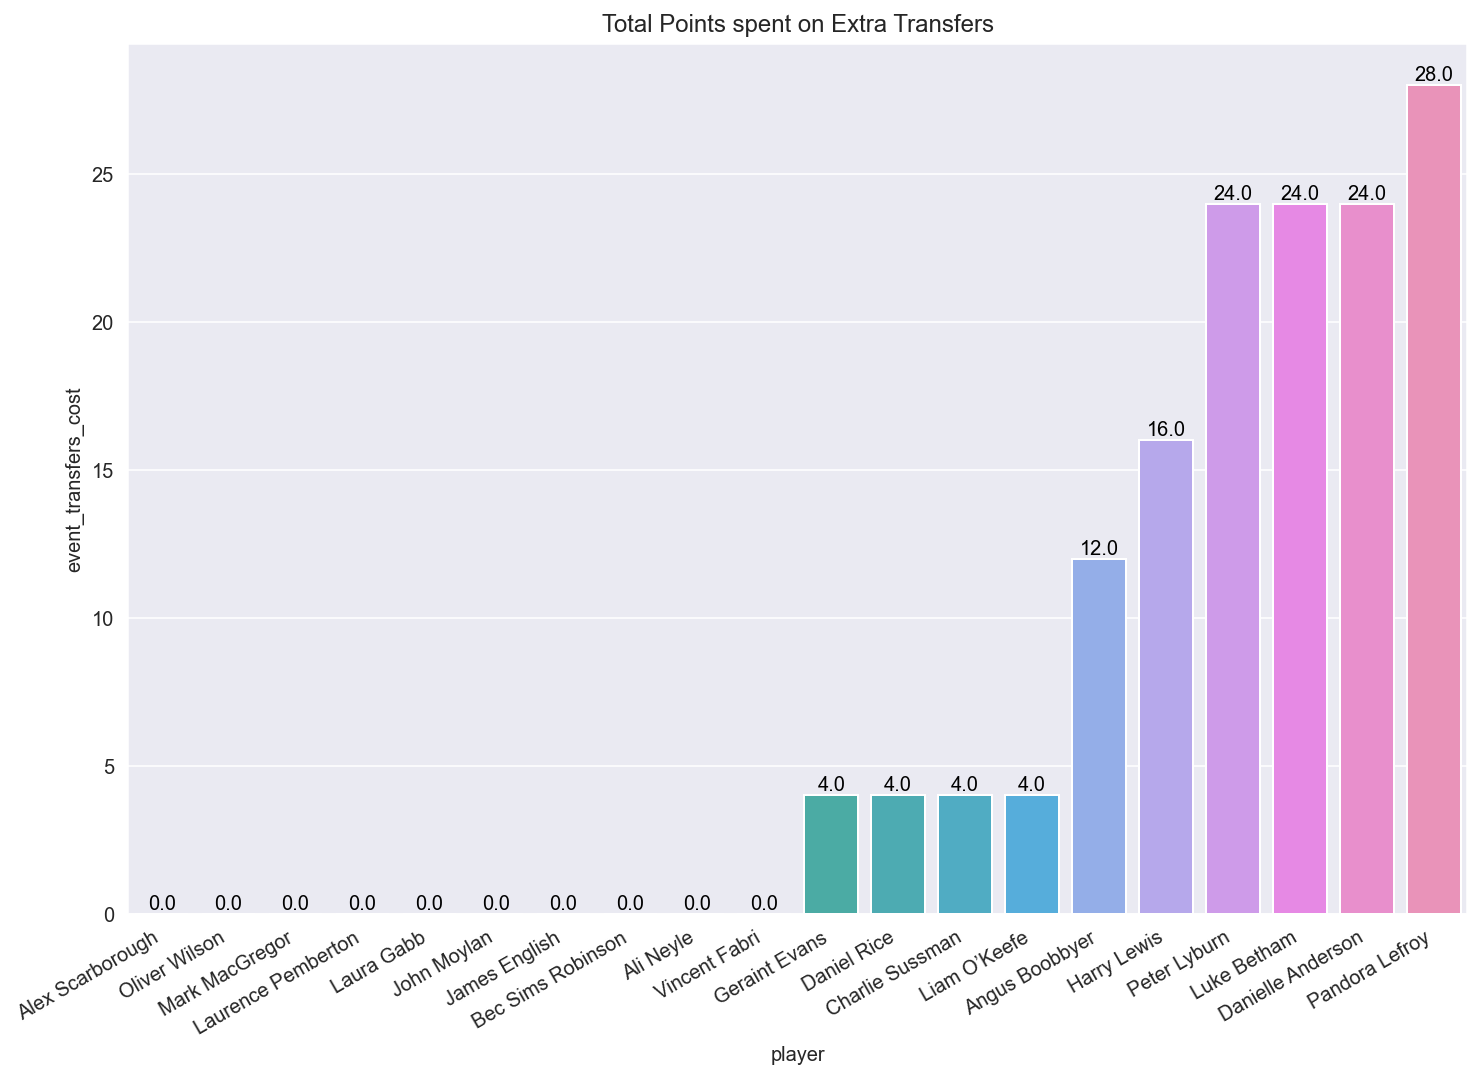

In [16]:
# Extra Transfers cost
df_temp = df_all.groupby('player').sum()[['event_transfers_cost']].sort_values('event_transfers_cost')
plt.figure(figsize=(12,8))
chart = sns.barplot(y=df_temp.event_transfers_cost,x=df_temp.index)
plt.title("Total Points spent on Extra Transfers")
plt.xticks(rotation=30,ha="right")
for p in chart.patches:
    chart.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

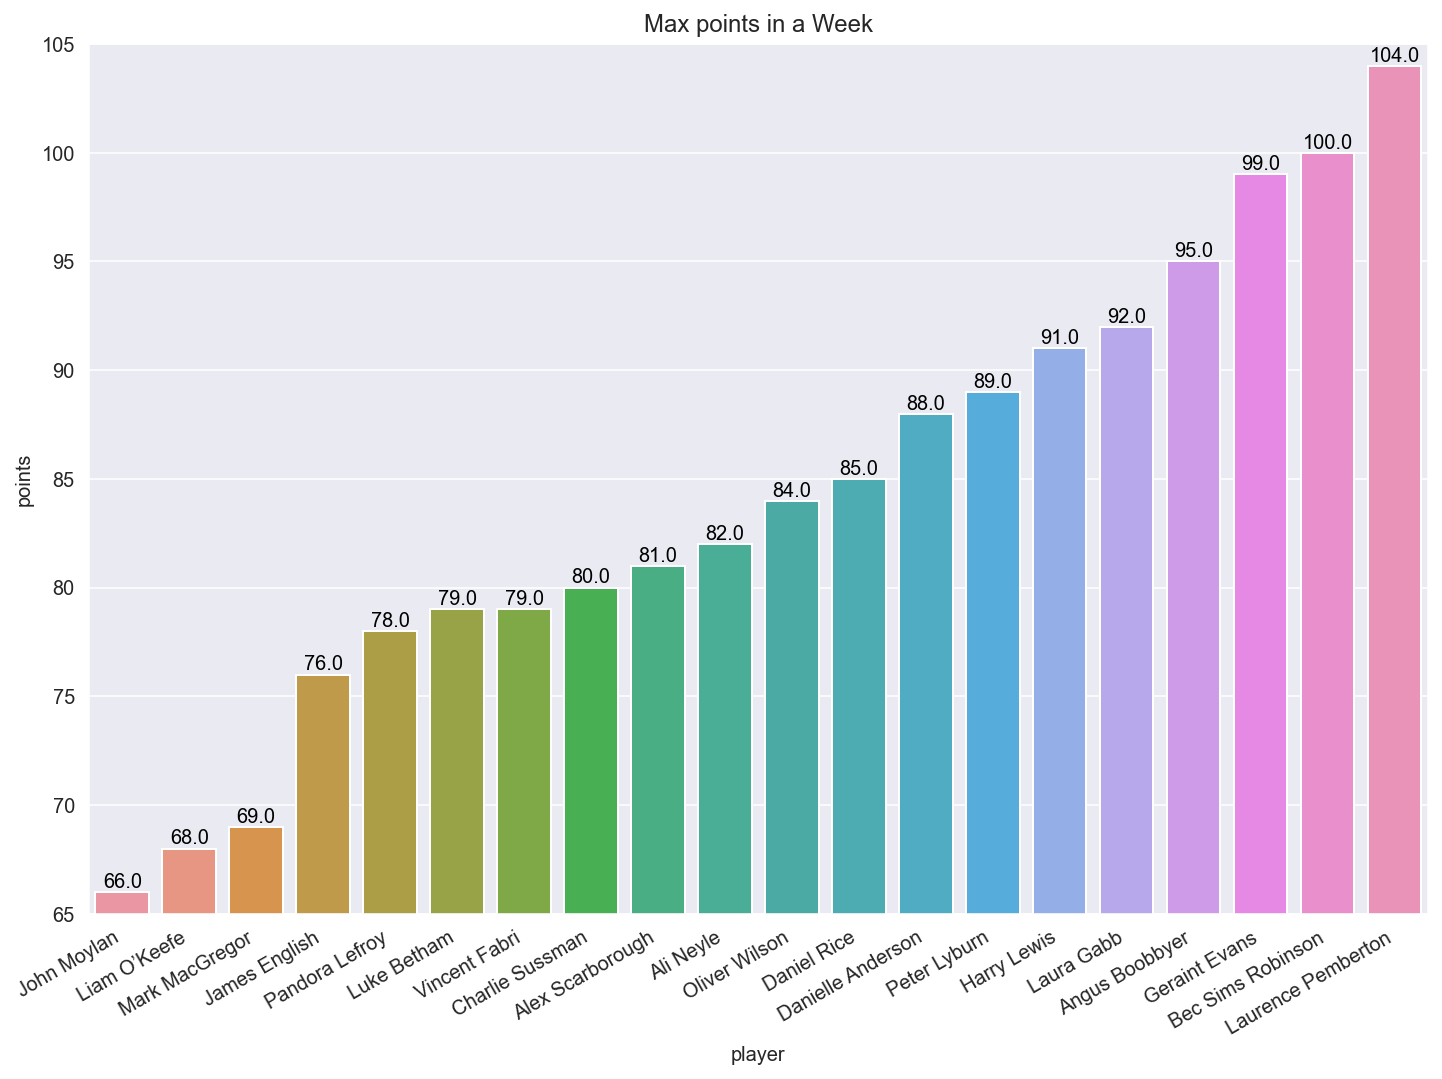

In [17]:
# Max points in a week
df_temp = df_all.groupby('player').max()[['points']].sort_values('points')
plt.figure(figsize=(12,8))
chart = sns.barplot(y=df_temp.points,x=df_temp.index)
plt.title("Max points in a Week")
plt.xticks(rotation=30,ha="right")
for p in chart.patches:
    chart.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.ylim(65,105)
plt.show()

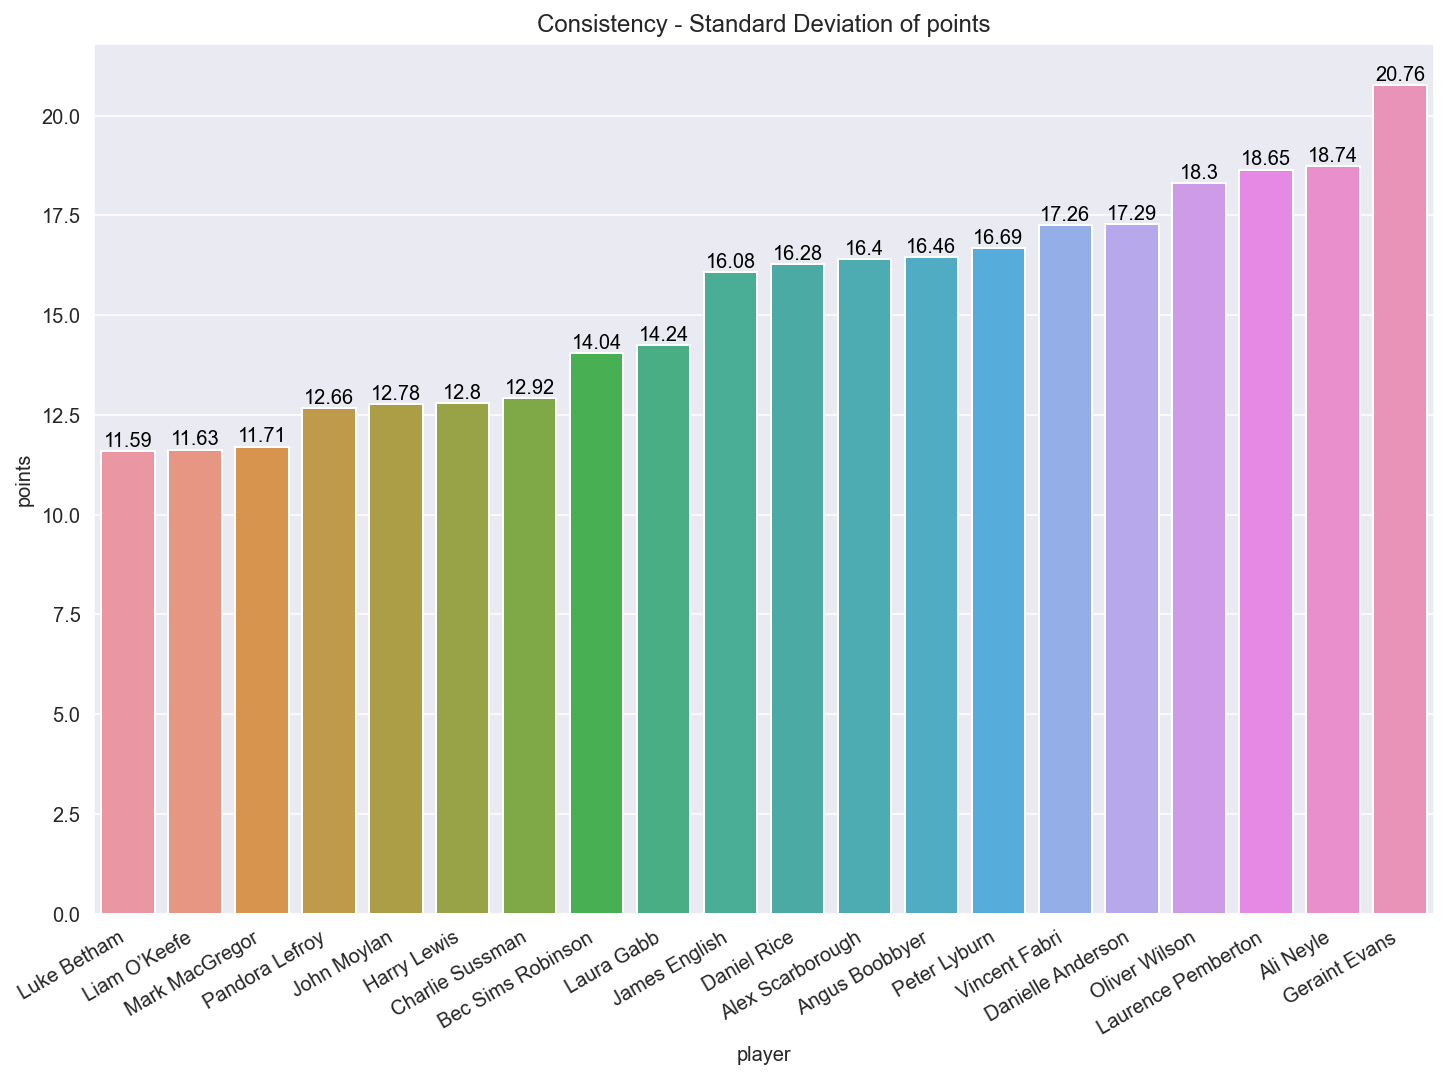

In [18]:
# Max points in a week
df_temp = df_all.groupby('player').std()[['points']].sort_values('points')
plt.figure(figsize=(12,8))
chart=sns.barplot(y=df_temp.points,x=df_temp.index)
plt.title("Consistency - Standard Deviation of points")
plt.xticks(rotation=30,ha="right")
for p in chart.patches:
    chart.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

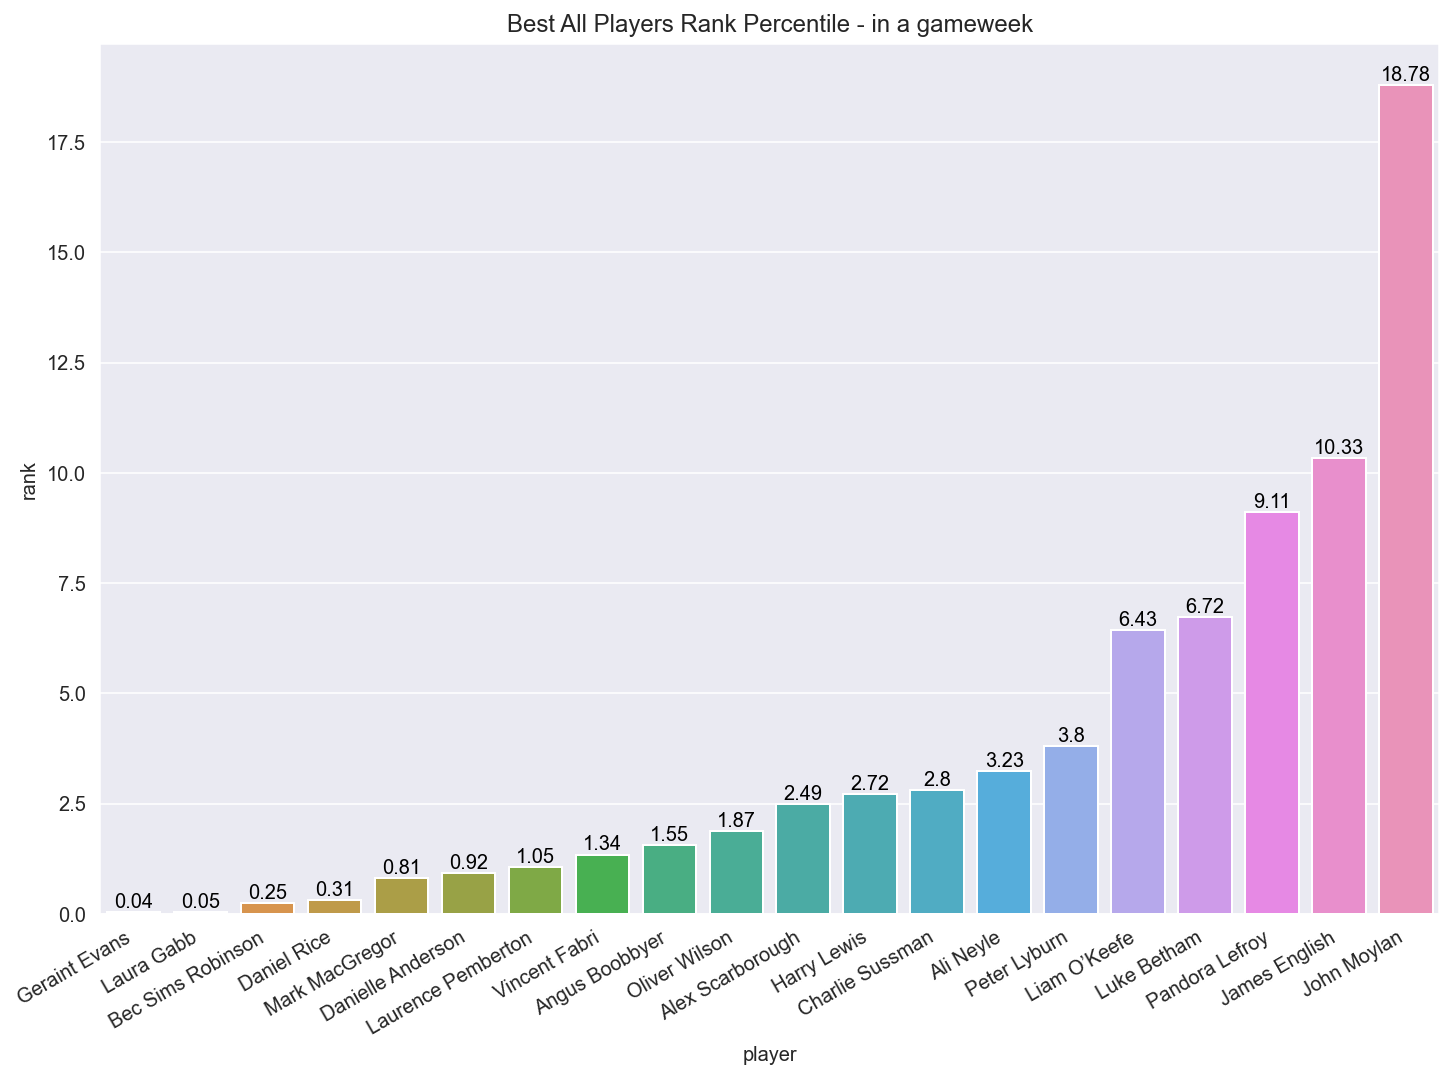

In [19]:
# Best UK Rank Percentile in a gameweek
df_temp = df_all.groupby('player').min()[['rank']].sort_values('rank')/int(json_data['total_players'])*100
plt.figure(figsize=(12,8))
chart=sns.barplot(y=df_temp['rank'],x=df_temp.index)
plt.title("Best All Players Rank Percentile - in a gameweek")
plt.xticks(rotation=30,ha="right")
for p in chart.patches:
    chart.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

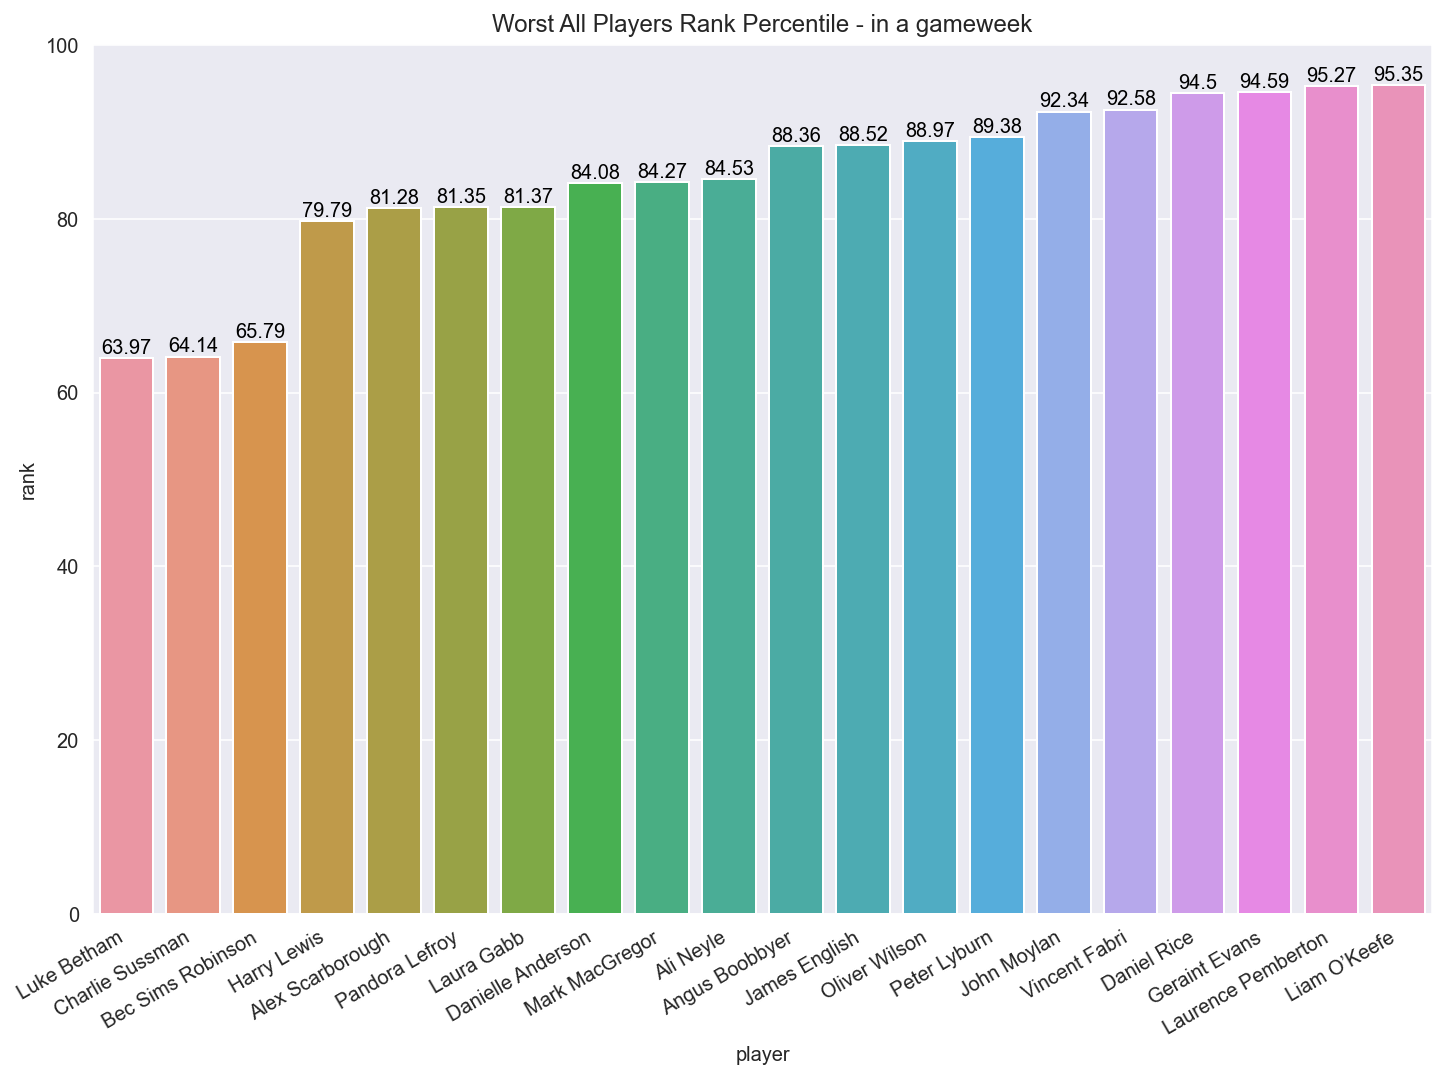

In [20]:
# Worst UK Rank Percentile in a gameweek
df_temp = df_all.groupby('player').max()[['rank']].sort_values('rank')/int(json_data['total_players'])*100
plt.figure(figsize=(12,8))
chart = sns.barplot(y=df_temp['rank'],x=df_temp.index)
plt.title("Worst All Players Rank Percentile - in a gameweek")
plt.xticks(rotation=30,ha="right")
for p in chart.patches:
    chart.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

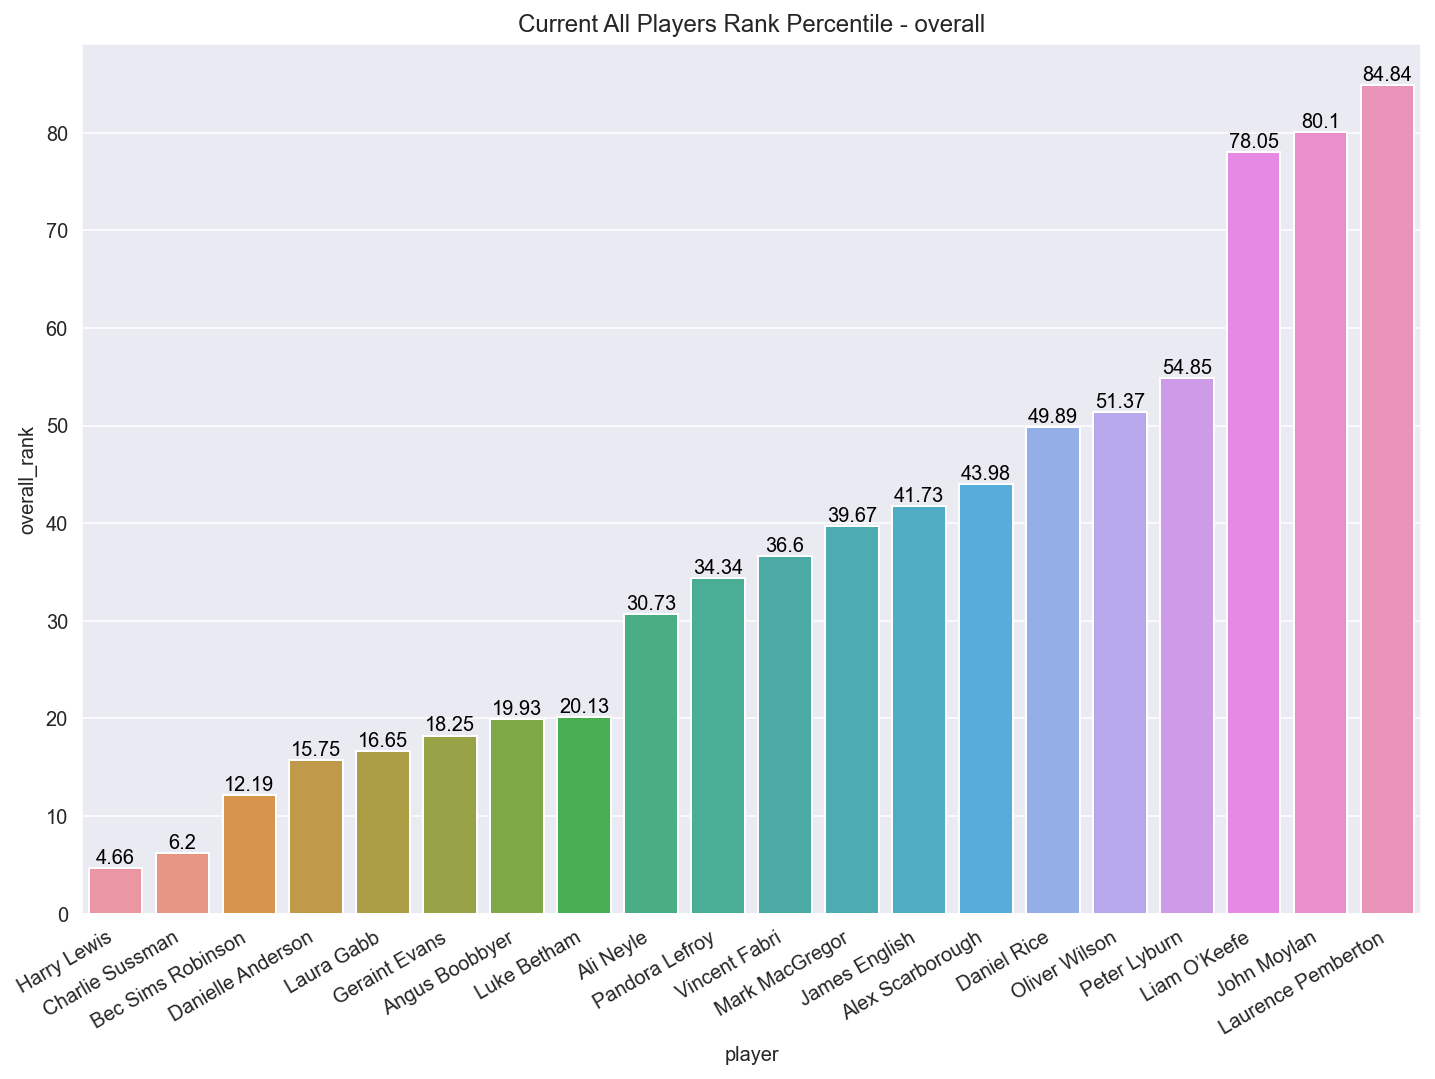

In [21]:
# Current all players rank
df_temp = df_all[df_all['event']==df_all['event'].max()][['overall_rank','player']].sort_values('overall_rank')
df_temp['overall_rank']=df_temp['overall_rank']/int(json_data['total_players'])*100
plt.figure(figsize=(12,8))
chart = sns.barplot(y=df_temp['overall_rank'],x=df_temp.player)
plt.title("Current All Players Rank Percentile - overall")
plt.xticks(rotation=30,ha="right")
for p in chart.patches:
    chart.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

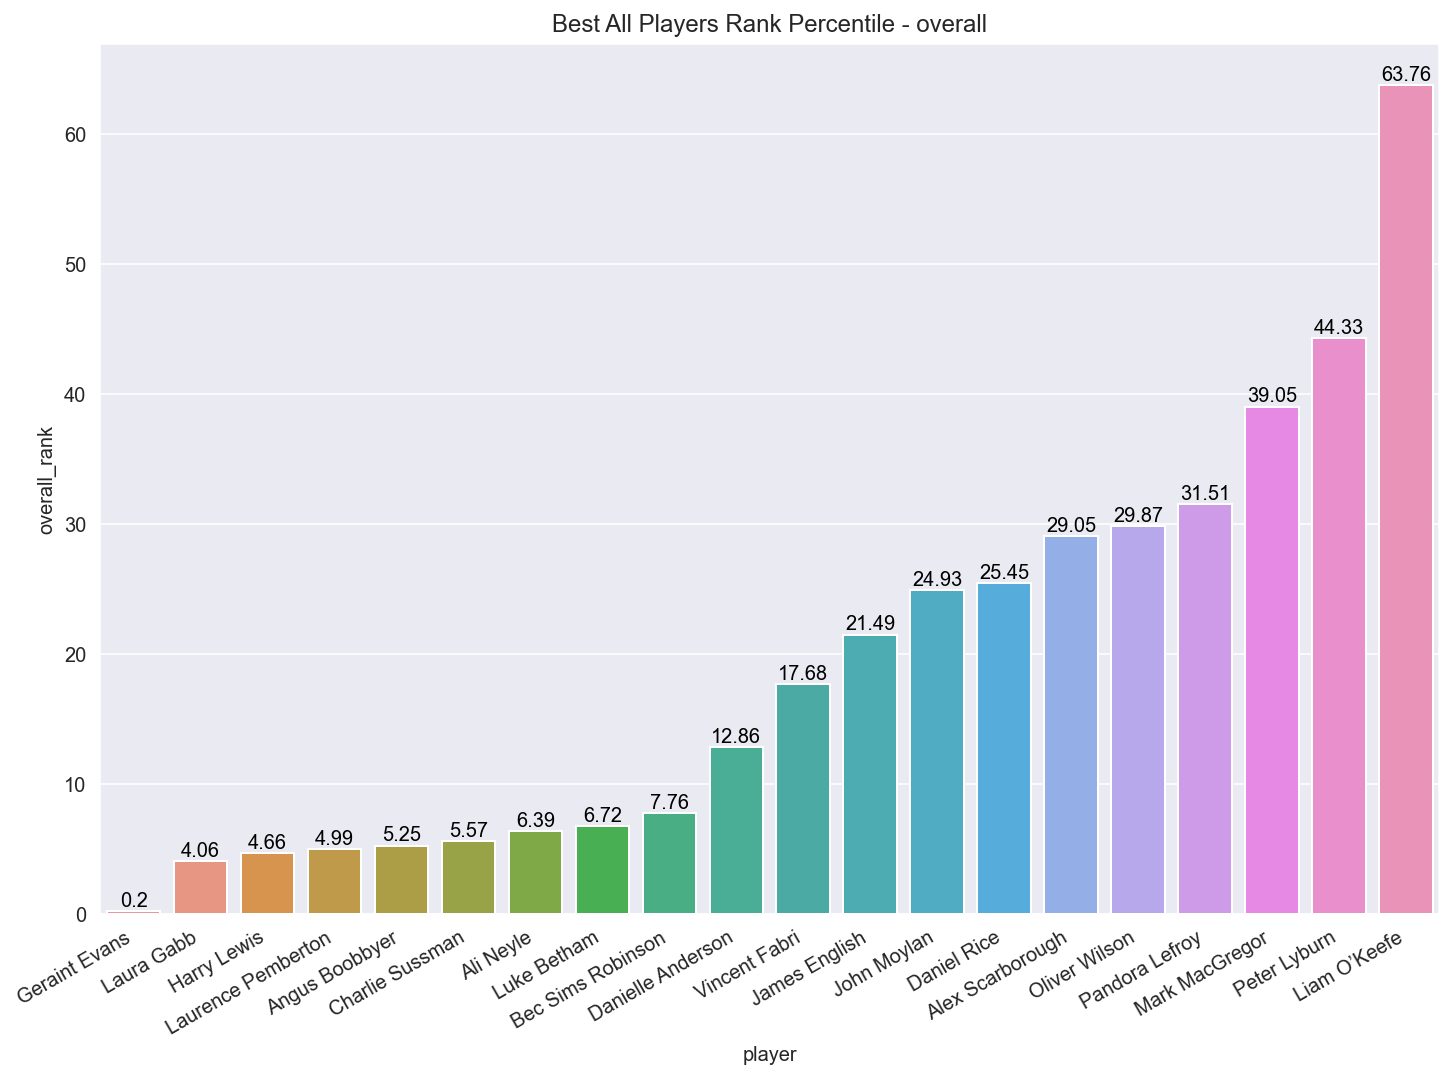

In [22]:
# Best UK Rank Percentile in a gameweek
df_temp = df_all.groupby('player').min()[['overall_rank']].sort_values('overall_rank')/int(json_data['total_players'])*100
plt.figure(figsize=(12,8))
chart = sns.barplot(y=df_temp['overall_rank'],x=df_temp.index)
plt.title("Best All Players Rank Percentile - overall")
plt.xticks(rotation=30,ha="right")
for p in chart.patches:
    chart.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

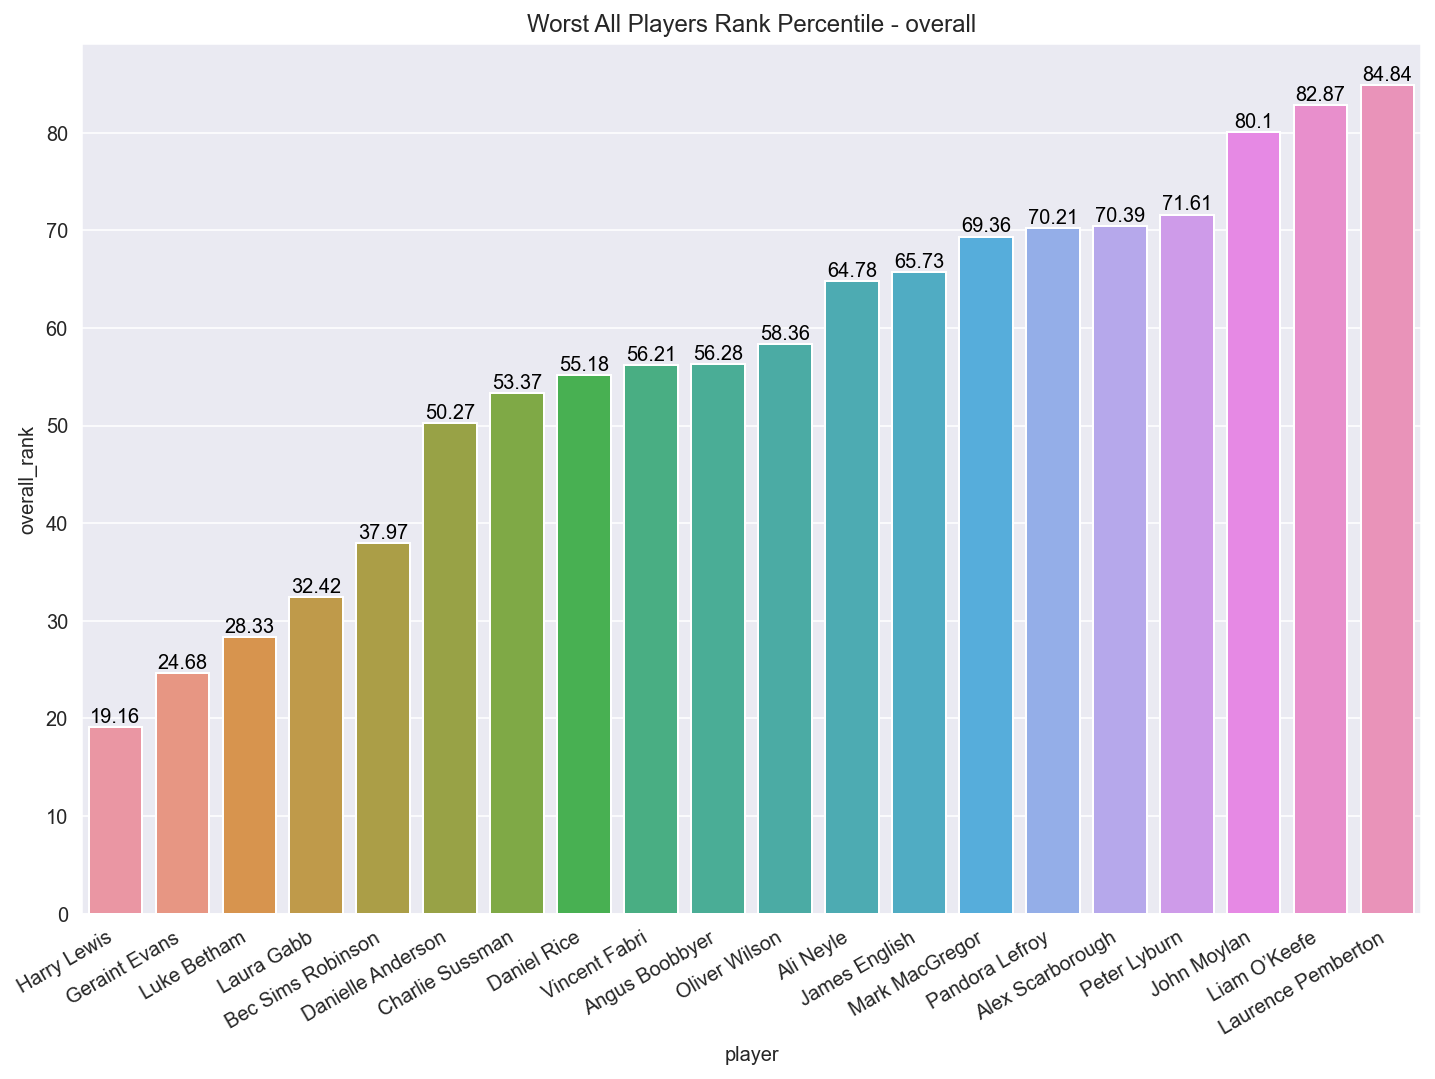

In [23]:
# Best UK Rank Percentile in a gameweek
df_temp = df_all.groupby('player').max()[['overall_rank']].sort_values('overall_rank')/int(json_data['total_players'])*100
plt.figure(figsize=(12,8))
chart = sns.barplot(y=df_temp['overall_rank'],x=df_temp.index)
plt.title("Worst All Players Rank Percentile - overall")
plt.xticks(rotation=30,ha="right")
for p in chart.patches:
    chart.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

In [24]:
df_all = df_all.sort_values(by='event')
rank_list = []
for e in df_all.event.unique():
    df_temp = df_all[df_all.event==e]
    rank_list+=df_temp.total_points.rank(method='min',ascending=False).tolist()

In [25]:
df_all['rankpw']=rank_list

In [26]:
curr_rank_list = df_all[df_all.event==13].sort_values("total_points",ascending=False)["player"].tolist()

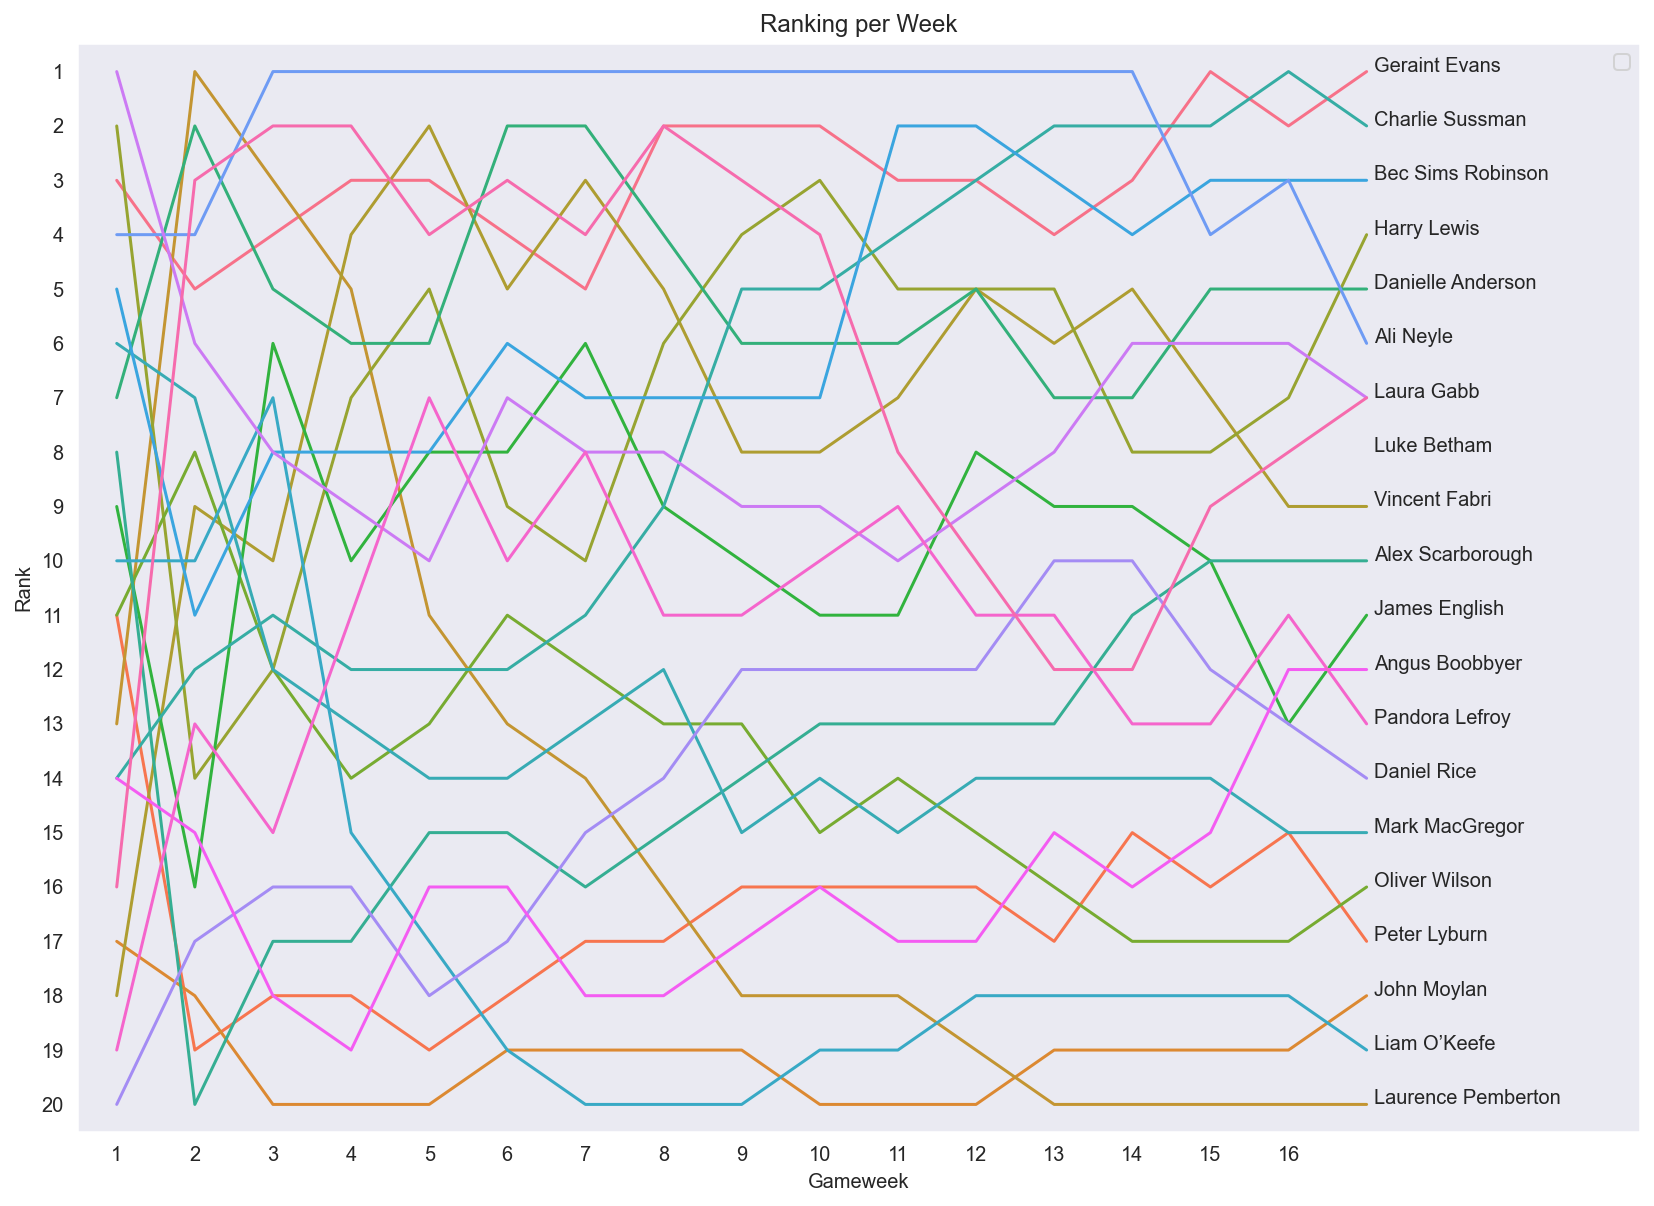

In [33]:
sns.set_style('dark')
plt.figure(figsize=(14,10))
ranking=sns.lineplot(y=df_all.rankpw,x=df_all.event,hue=df_all.player)
for i, name in enumerate(curr_rank_list):
    ranking.annotate(name,(17.1,i+1))
plt.yticks(range(1,21))
plt.xticks(range(1,17))
plt.xlim(0.5,20.5)
plt.ylim(20.5,0.5)
plt.title("Ranking per Week")
plt.xlabel("Gameweek")
plt.ylabel("Rank")
plt.legend("")
plt.show()

In [31]:
dp.login(token="091830a120b8c1f1cde36fd23c9e06d4b81bfc6b")
r = dp.Report(
    f'### LukeStepsUp FPL League',
    f'Graphing the most important league in FPL',
    dp.Plot(ranking),
    dp.Plot(bench_chart),
)

Connected successfully to https://datapane.com as lukebetham


In [32]:
r.publish(name=f'FPL League Rankings', open=True, description=f'')

Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/u/lukebetham/reports/fpl-league-rankings/


In [488]:
df_all[df_all.event==1].total_points.rank(method='min',ascending=False)

0     1.0
0     4.0
0     5.0
0     9.0
0     7.0
0     1.0
0     3.0
0     8.0
0     5.0
0     9.0
0    11.0
0    12.0
Name: total_points, dtype: float64

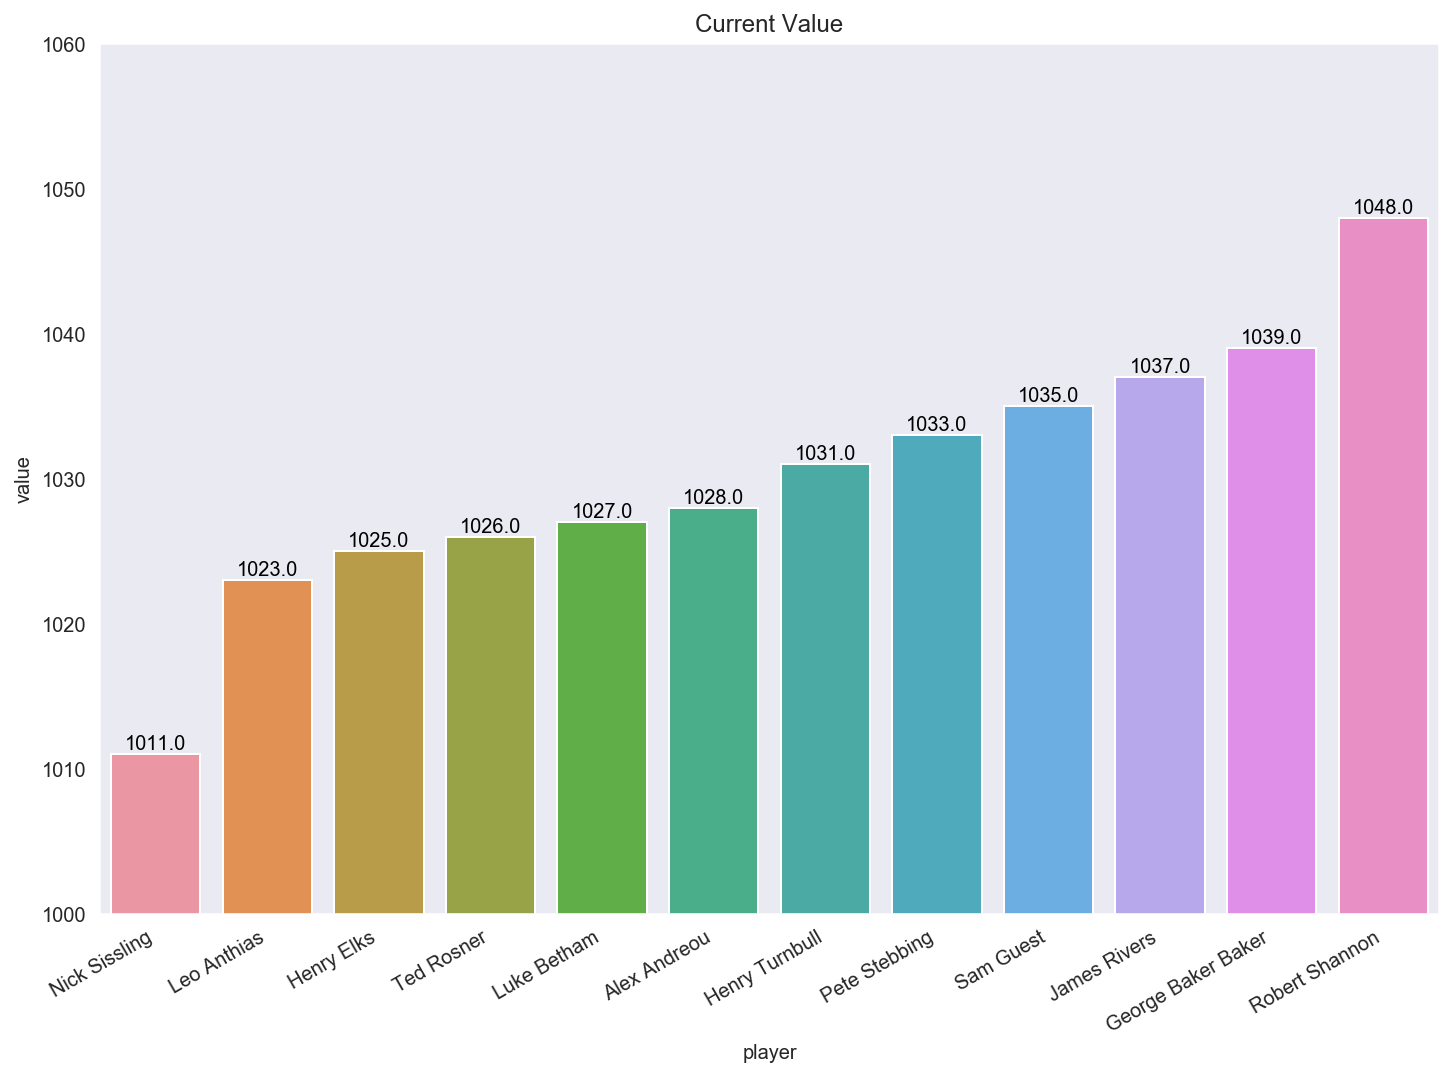

In [489]:
# Current all players rank
df_temp = df_all[df_all['event']==df_all['event'].max()][['value','bank','player']].sort_values('value')
# df_temp['']
plt.figure(figsize=(12,8))
chart = sns.barplot(y=df_temp['value'],x=df_temp.player)
plt.title("Current Value")
plt.xticks(rotation=30,ha="right")
for p in chart.patches:
    chart.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.ylim(1000,1060)
plt.show()

In [490]:
df_all[df_all['event']==14]

,event,points,total_points,rank,rank_sort,overall_rank,bank,value,event_transfers,event_transfers_cost,points_on_bench,player,team_name,rankpw
13,14.0,84.0,760.0,603725.0,613887.0,2334557.0,0.0,1013.0,0.0,0.0,1.0,Nick Sissling,Fiddler on the Huth,12.0
13,14.0,88.0,864.0,387181.0,389629.0,237506.0,0.0,1032.0,2.0,0.0,0.0,James Rivers,Balsamic Vinagre,4.0
13,14.0,84.0,860.0,603725.0,612892.0,273230.0,4.0,1029.0,0.0,0.0,1.0,Pete Stebbing,Diego Marrastebbo,5.0
13,14.0,79.0,790.0,1114413.0,1123054.0,1526877.0,3.0,1018.0,1.0,0.0,10.0,Luke Betham,Nanas Squad,10.0
13,14.0,75.0,851.0,1529421.0,1565282.0,364058.0,1.0,1038.0,0.0,0.0,3.0,George Baker Baker,Warnocked Out,7.0
13,14.0,87.0,803.0,446331.0,446409.0,1208177.0,2.0,1025.0,2.0,4.0,0.0,Henry Turnbull,Turnbull’s Revenge,8.0
13,14.0,78.0,772.0,1227983.0,1236733.0,1993664.0,3.0,1022.0,1.0,0.0,1.0,Henry Elks,Debbie Does Gallas,11.0
13,14.0,77.0,856.0,1375748.0,1388739.0,308143.0,1.0,1028.0,2.0,0.0,5.0,Sam Guest,lads lads lads,6.0
13,14.0,57.0,794.0,4437490.0,4461473.0,1424634.0,7.0,1025.0,1.0,0.0,1.0,Alex Andreou,Nanas Squad,9.0
13,14.0,65.0,899.0,3094843.0,3120899.0,54034.0,7.0,1039.0,1.0,0.0,4.0,Robert Shannon,Abbeville Rovers,1.0
